# Grade Challenge 5
* Nama  : Rizky Chester Abadi
* Batch : RMT-030

Program ini dibuat untuk memprediksi default_payment_next_month menggunakan dataset yang diambil dari bigquery dengan menggunakan model Algoritma logistic Regression,SVM,dan KNN dengan Hyperparameter Tuning.

# Query SQL

#Pembuatan Query dari google colab

from google.colab import auth
from google.cloud import bigquery
import pandas as pd
auth.authenticate_user()
print('Authenticated')

project_id = "caramel-feat-415109"
client = bigquery.Client(project=project_id)


query =""" SELECT
        limit_balance,
        CAST(sex AS INT64) AS sex,
        CAST(education_level AS INT64) AS education_level,
        CAST(marital_status AS INT64) AS marital_status,
        age,
        CAST(pay_0 AS INT64) AS pay_0,
        CAST(pay_2 AS INT64) AS pay_2,
        CAST(pay_3 AS INT64) AS pay_3,
        CAST(pay_4 AS INT64) AS pay_4,
        CAST(pay_5 AS FLOAT64) AS pay_5,
        CAST(pay_6 AS FLOAT64) AS pay_6,
        bill_amt_1,
        bill_amt_2,
        bill_amt_3,
        bill_amt_4,
        bill_amt_5,
        bill_amt_6,
        pay_amt_1,
        pay_amt_2,
        pay_amt_3,
        pay_amt_4,
        pay_amt_5,
        pay_amt_6,
        CAST(default_payment_next_month AS INT64) AS default_payment_next_month
    FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 59790
"""
# 59790 diperoleh dari 30(batch) x 1993(tahun lahir)

# Set up the query
df1 = client.query(query).to_dataframe()
df1

#Convert dataset ke CSV
df1.to_csv('P1G5_SET_1_RizkyChester.csv', index=False)

# Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle as pkl

from sklearn.neighbors import KNeighborsClassifier  #Untuk KNN
from sklearn.svm import SVC #Untuk SVC
from sklearn.linear_model import LogisticRegression #Untuk Logistic Regression

from sklearn.model_selection import train_test_split  #Untuk split data Train test

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score


# Data Loading

In [39]:
# Load Dataset hasil query 
df=pd.read_csv(r'C:\Users\rizqc\Documents\Tugas Tugas\p1-ftds030-rmt-g5-RizkyChesterAbadi\P1G5_SET_1_RizkyChester.csv')
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0,0,0,0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0,0,0,0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0,0,0,0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0,0,0,0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0,0,0,-1,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1,-1,-1,-2,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1,-1,-1,-1,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2,-2,-2,-2,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2,-2,-2,-2,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


In [40]:
# Cek data duplicate 
df.duplicated().sum()

1

In [41]:
# drop data duplicate
df.drop_duplicates()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0,0,0,0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0,0,0,0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0,0,0,0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0,0,0,0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0,0,0,-1,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1,-1,-1,-2,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1,-1,-1,-1,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2,-2,-2,-2,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2,-2,-2,-2,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


In [42]:
#Melihat tipe-tipe kolom/feature dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   int64  
 6   pay_2                       2965 non-null   int64  
 7   pay_3                       2965 non-null   int64  
 8   pay_4                       2965 non-null   int64  
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [43]:
#Melihat beberapa data teratas
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0,0,0,0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0,0,0,0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0,0,0,0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0,0,0,0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0,0,0,-1,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0,0,0,0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0,0,0,0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0,0,0,0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0,0,0,0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0,0,0,0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [44]:
#Melihat Beberapa Data terbawah
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1,-1,-1,-1,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0,0,-1,-1,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1,-1,-1,-2,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1,-1,-1,-1,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1,-1,-1,-2,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1,-1,-1,-2,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1,-1,-1,-1,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2,-2,-2,-2,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2,-2,-2,-2,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1,-2,-2,-2,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


# Exploratory Data Analysis (EDA)

In [45]:
#Cek Missing Value
df.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [46]:
# Melihat data Unik dari feature-feature
df.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

In [47]:
# Menampilkan variable default_payment_next_month yang akan diprediksi datanya

df['default_payment_next_month']

0       1
1       0
2       1
3       0
4       0
       ..
2960    0
2961    1
2962    1
2963    0
2964    0
Name: default_payment_next_month, Length: 2965, dtype: int64

In [48]:
#Melihat value counts dari feature default_payment_next_month
df['default_payment_next_month'].value_counts()

default_payment_next_month
0    2330
1     635
Name: count, dtype: int64

Insight: Artinya dalam feature default_payment_next_month sebanyak 2330 bisa membayar bulan depan, dan sebanyak 635 tidak bisa membayar bulan depan

In [49]:
df['default_payment_next_month'].nunique()

2

Dalam Feature 'default_payment_next_month' sebagai feature yang menjadi acuan dari feature yang lain terdapat dua nilai unik yang tidak memiliki tingkatan. Dengan demikian dapat dikatakan bahwa ini termasuk dalam binary classification dan dapat dilakukan analisa dengan menggunakan Logistic Regression.

# Feature Engineering

In [50]:
# define x dan y 
X = df.drop("default_payment_next_month", axis=1)
y = df['default_payment_next_month']
X


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,1,6,1,54.0,0,0,0,0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,1,4,1,49.0,0,0,0,0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,2,6,2,22.0,0,0,0,0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,2,4,2,33.0,0,0,0,0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,1,4,2,32.0,0,0,0,-1,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1,-1,-1,-2,-2.0,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2961,50000.0,2,3,1,51.0,-1,-1,-1,-1,-2.0,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2962,450000.0,2,2,1,38.0,-2,-2,-2,-2,-2.0,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,50000.0,2,2,1,44.0,-2,-2,-2,-2,-2.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0


Insight: data X terdapat 2965 Baris dan 23 kolom

In [51]:
# Memisahkan data Train-Set dan data Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (2223,)
Test Size  :  (742,)


In [52]:
# Feature Scaling dengan StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

Menggunakan StandardScaler untuk menskalakan feature yang ada agar memiliki rata-rata 0 dan varians 1

In [53]:
# Show data train y
y_train

2303    0
2105    0
2946    0
2072    0
1508    1
       ..
658     1
2451    0
2490    0
1576    0
2885    0
Name: default_payment_next_month, Length: 2223, dtype: int64

Tidak dilakukan encoding untuk encoding data train y yang numerik

# Model Definition

In [54]:
# Show data Train X yang telah di scaling
X_train_scal


array([[-0.0123789 ,  0.80643293, -1.0938812 , ...,  0.04343701,
        -0.21099492, -0.29316897],
       [-0.41235413, -1.24002872, -1.0938812 , ..., -0.00875544,
        -0.28321459, -0.21546623],
       [-0.65233927,  0.80643293,  0.17328811, ..., -0.33976744,
        -0.28333014, -0.34351443],
       ...,
       [-0.33235909, -1.24002872, -1.0938812 , ..., -0.33976744,
        -0.28333014, -0.34351443],
       [ 1.10755175,  0.80643293, -1.0938812 , ..., -0.33976744,
        -0.28333014, -0.34351443],
       [-0.57234423, -1.24002872,  0.17328811, ..., -0.33976744,
        -0.28333014, -0.34351443]])

In [55]:
#Melihat Rata-rata dari data train X yg telah discaling
X_train_scal.mean()

-2.2026838705622226e-17

In [56]:
#Melihat Standard Deviasi dari data train X yg telah discaling
X_train_scal.std()

1.0

In [57]:
#Melihat data unik dari data train y 
y_train.nunique()

2

In [58]:
# Model Menggunakan Logistic Regression
model_logreg = LogisticRegression(penalty='l2', C=1.0, random_state=0)


In [59]:
# Model Menggunakan algorithma KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scal, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
# Model menggunakan SVM dengan kernel RBF
svm_non_scaled = SVC(kernel='rbf')
svm_scaled = SVC(kernel='rbf')



Untuk Classification dapat dilakukan HyperParameter Tuning Dengan Logistic Regression, SVM, dan KNN untuk menentukan yang paling baik.Alasan menggunakan cara-cara tersebut adalah: 
* Logistic Regression adalah algorithma Machine Learning yang digunakan untuk menyelesaikan classification Problem.Logistic Regression menggunakan Sigmoid Function untuk memprediksi kelas/Class. Untuk Binary Classification ada ambang batas yang digunakan untuk mengubah suatu probabilitas menjadi Binary Class.
* KNN(K-Nearest Neighbor) adalah Learning Algorithm yang mengandalkan ide bahwa titik data yang serupa cenderung memiliki nilai/label yang sama.KNN juga dapat digunakan untuk Classification Problem.
* SVM(Support Vector Machine) adalah jenis Supervised Learning yang digunakan untuk menyelesaikan Classification problem dan regresi

In [61]:
#Membuat Baseline model Hypertuning menggunakan Logistic Regression

lr_h = LogisticRegression()
lr_h.fit(X_train_scal, y_train)

LogisticRegression()

In [62]:
#Membuat Baseline model Hypertuning menggunakan  knn

knn_h = KNeighborsClassifier()
knn_h.fit(X_train_scal, y_train)

KNeighborsClassifier()

In [63]:
#Membuat Baseline model Hypertuning menggunakan svm
svm_h = SVC()
svm_h.fit(X_train_scal, y_train)

SVC()

# Model Training

#### Model Training menggunakan Logistic Regression

In [64]:
#Train menggunakan Model Logistic Regression
model_logreg.fit(X_train_scal, y_train)

print('Coefficient : ', model_logreg.coef_)
print('Intercept   : ', model_logreg.intercept_)

Coefficient :  [[-0.18995854  0.03184128 -0.05932614 -0.09891318  0.08410958  0.75191318
  -0.07144142  0.09130431  0.02676682  0.20012123  0.08013411 -0.28353447
  -0.06934172  0.60984366 -0.29629669  0.02181148  0.02762384 -0.12408393
  -0.51593672 -0.33069773 -0.0131476  -0.09044285 -0.05137364]]
Intercept   :  [-1.63298483]


Insight: Melatih kedua variabel dengan fungsi fit Logistic Regression


#### Model Training menggunakan KNN(K-Nearest Neighbor)

In [65]:
#Training using KNN dengan 
#n_neighbors mengacu pada jumlah data terdekat dari titik prediksi yg digunakan untuk klasifikasi
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scal, y_train)

KNeighborsClassifier(n_neighbors=3)

Insight: Melatih kedua variabel dengan fungsi fit model knn

In [66]:
# Membuat Model Prediction
y_pred_train_knn = knn.predict(X_train_scal)
y_pred_test_knn = knn.predict(X_test_scal)
y_pred_train_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Model Training Menggunakan SVM

In [67]:
# Training Menggunakan Algorithm SVM dengan kernel rbf
svm_non_scaled = SVC(kernel='rbf')
svm_scaled = SVC(kernel='rbf')

svm_non_scaled.fit(X_train, y_train)
svm_scaled.fit(X_train_scal, y_train)


SVC()

insight: melatih kedua variabel dengan fungsi fit SVM data yang di scaled dan tidak.

#### Hyperparameter Tuning Baseline model dengan ketiga model

* Model Logistic Regression

F1 Score - Train Set  :  0.40310077519379844 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      1753
           1       0.74      0.28      0.40       470

    accuracy                           0.83      2223
   macro avg       0.79      0.63      0.65      2223
weighted avg       0.81      0.83      0.79      2223
 

Confusion Matrix      : 


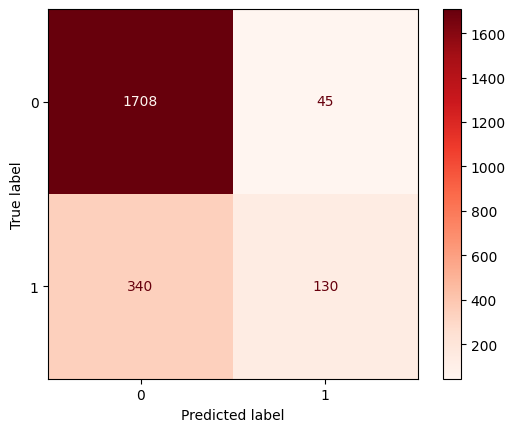

In [68]:
# Check Performance dari Model logistic regression terhadap Train-Set

y_pred_train_lr = lr_h.predict(X_train_scal)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_lr), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_lr), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr_h, X_train_scal, y_train, cmap='Reds'))

Insight: Dari analisa diatas didapatkan bahwa dengan precission data yang dianggap benar-benar data '0' di dapat 93% dan data '1' sebesar 74% data yang benar. Dengan recall data yang dianggap benar-benar data '0' di dapat 97% dan data '1' sebesar 28% data yang benar. Dengan f1-score 
data yang dianggap benar-benar data '0' di dapat 90% dan data '1' sebesar 40% data yang benar.Untuk mengetahui apakah hasil tersebut valid, dapat digunakan Cross Validation. Cross Validation secara sistematis membuat dan mengevaluasi beberapa model pada beberapa subkumpulan dataset. Cross Validation memberikan pengukuran kinerja seperti mean dan standard deviasi.
* Mean:seberapa baik kinerja rata-rata prosedur tersebut.
* Standard Deviation: seberapa besar prosedur yang diharapkan bervariasi dalam praktiknya.
* Data True positive(yang membayar bulan depan) sebanyak 1708

In [69]:
# Cross Validation model Logistic Regression menggunakan 'cross_val_score'


f1_train_cross_val_lr = cross_val_score(lr_h,
                                     X_train_scal,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val_lr)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val_lr.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val_lr.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val_lr.mean()-f1_train_cross_val_lr.std()) , '-', (f1_train_cross_val_lr.mean()+f1_train_cross_val_lr.std()))

F1 Score - All - Cross Validation  :  [0.3718593  0.45333333 0.42608696]
F1 Score - Mean - Cross Validation :  0.4170931954458282
F1 Score - Std - Cross Validation  :  0.03386414499057715
F1 Score - Range of Test-Set       :  0.383229050455251 - 0.45095734043640534


Insight: Mean saat Cross validation adalah kira-kira 0,417, yang menunjukkan rata-rata skor F1 di seluruh lipatan. Standard Deviation saat Cross Validation 0.034 menunjukkan beberapa variabilitas dalam kinerja di seluruh lipatan. Range Cross Validation dari F1 Score di berbagai bagian yang berbeda adalah sekitar 0,383 hingga 0,451, yang menunjukkan variabilitas kinerja yang diamati pada subkumpulan data yang berbeda.


* Model KNN

F1 Score - Train Set  :  0.5653333333333334 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1753
           1       0.76      0.45      0.57       470

    accuracy                           0.85      2223
   macro avg       0.81      0.71      0.74      2223
weighted avg       0.84      0.85      0.84      2223
 

Confusion Matrix      : 


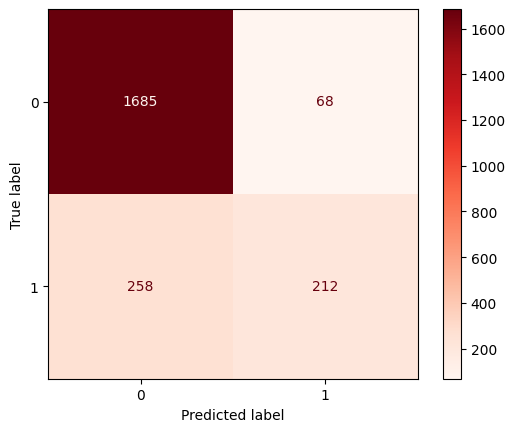

In [70]:
# Check Performance dari KNN regression terhadap Train-Set

y_pred_train_knn = knn_h.predict(X_train_scal)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_knn), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_h, X_train_scal, y_train, cmap='Reds'))




Insight: 
* Dari analisa diatas didapatkan bahwa dengan precission data yang dianggap benar-benar data '0' di dapat 87% dan data '1' sebesar 76% data yang benar. Dengan recall data yang dianggap benar-benar data '0' di dapat 96% dan data '1' sebesar 45% data yang benar. Dengan f1-score 
data yang dianggap benar-benar data '0' di dapat 91% dan data '1' sebesar 57% data yang benar.Untuk mengetahui apakah hasil tersebut valid, dapat digunakan Cross Validation. Cross Validation secara sistematis membuat dan mengevaluasi beberapa model pada beberapa subkumpulan dataset. Cross Validation memberikan pengukuran kinerja seperti mean dan standard deviasi.
* Mean:seberapa baik kinerja rata-rata prosedur tersebut.
* Standard Deviation: seberapa besar prosedur yang diharapkan bervariasi dalam praktiknya.

* Data True positive(yang membayar bulan depan) sebanyak 1685

In [71]:
# Cross Validation model KNN menggunakan 'cross_val_score'

f1_train_cross_val_knn = cross_val_score(knn_h,
                                     X_train_scal,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val_knn)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val_knn.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val_knn.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val_knn.mean()-f1_train_cross_val_knn.std()) , '-', (f1_train_cross_val_knn.mean()+f1_train_cross_val_knn.std()))

F1 Score - All - Cross Validation  :  [0.38961039 0.49606299 0.39330544]
F1 Score - Mean - Cross Validation :  0.42632627368897263
F1 Score - Std - Cross Validation  :  0.04933437457379242
F1 Score - Range of Test-Set       :  0.3769918991151802 - 0.47566064826276505


Rata-rata nilai F1- Score dari model diatas adalah 0.426. Standard Deviation saat Cross Validation 0.049 menunjukkan beberapa variabilitas dalam kinerja di seluruh lipatan. Range Cross Validation dari F1 Score di berbagai bagian yang berbeda adalah sekitar 0,3377 hingga 0,476, yang menunjukkan variabilitas kinerja yang diamati pada subkumpulan data yang berbeda.

* Model SVM

F1 Score - Train Set  :  0.5269121813031161 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1753
           1       0.79      0.40      0.53       470

    accuracy                           0.85      2223
   macro avg       0.82      0.68      0.72      2223
weighted avg       0.84      0.85      0.83      2223
 

Confusion Matrix      : 


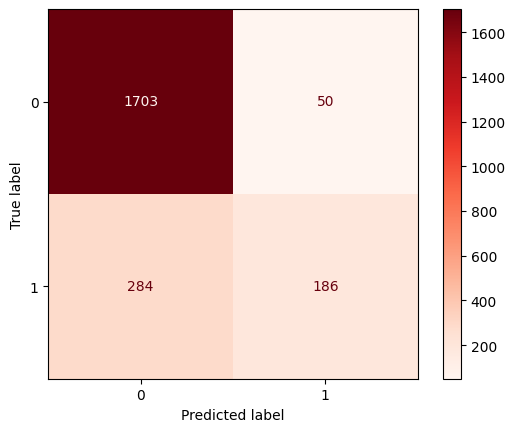

In [72]:
# Check Performance dari Model logistic regression terhadap Train-Set

y_pred_train_svm = svm_h.predict(X_train_scal)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_svm), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_svm), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_h, X_train_scal, y_train, cmap='Reds'))

Insight: 
* Dari analisa data train diatas didapatkan bahwa dengan precission data yang dianggap benar-benar data '0' di dapat 86% dan data '1' sebesar 79% data yang benar. Dengan recall data yang dianggap benar-benar data '0' di dapat 97% dan data '1' sebesar 40% data yang benar. Dengan f1-score 
data yang dianggap benar-benar data '0' di dapat 91% dan data '1' sebesar 53% data yang benar.
* Data True positive(yang membayar bulan depan) sebanyak 1703

In [73]:
# Cross Validation model SVM menggunakan 'cross_val_score'


f1_train_cross_val_svm = cross_val_score(svm_h,
                                     X_train_scal,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val_svm)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val_svm.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val_svm.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val_svm.mean()-f1_train_cross_val_svm.std()) , '-', (f1_train_cross_val_svm.mean()+f1_train_cross_val_svm.std()))

F1 Score - All - Cross Validation  :  [0.40375587 0.49792531 0.45      ]
F1 Score - Mean - Cross Validation :  0.4505603932493068
F1 Score - Std - Cross Validation  :  0.03844655609291789
F1 Score - Range of Test-Set       :  0.41211383715638894 - 0.48900694934222466


hasil Cross validation Rata-rata nilai F1- Score dari model diatas adalah 0.450. Standard Deviation saat Cross Validation 0.038 menunjukkan beberapa variabilitas dalam kinerja di seluruh lipatan. Range Cross Validation dari F1 Score di berbagai bagian yang berbeda adalah sekitar 0,401 hingga 0,489, yang menunjukkan variabilitas kinerja yang diamati pada subkumpulan data yang berbeda.

#### Hyperparameter Tuning dengan data train ketiga model


Hyperparameter Tuning Logistic Regression

In [74]:
# Untuk Logistic Regression HyperParameter Tuning : Grid Search
 # Menentukan param Grid
logistic_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                        'penalty': ['l2']}

logistic_grid_search = GridSearchCV(lr_h, logistic_param_grid, cv=5)

#Train Grid Search
logistic_grid_search.fit(X_train_scal, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']})

Insight:Dalam menentukan parameter grid search:
* C: adalah kebalikan dari regularisasi strength. Nilai C yang lebih tinggi menunjukkan bahwa model akan mencoba untuk menyesuaikan data pelatihan sebaik mungkin. Semakin tinggi nilai C, semakin kompleks modelnya (kurang regularisasi), yang bisa mengakibatkan overfitting pada data pelatihan jika tidak diatur dengan benar.
* penalty : adalah jenis regularisasi yang digunakan dalam model. Dalam kasus ini, 'l2' merujuk pada regularisasi L2, yang merupakan metode regularisasi yang umum digunakan.

Hyperparameter Tuning dengan KNN

In [75]:
#Untuk KNN HyperParameter Tuning : Grid Search
 # Menentukan param Grid
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance']}

knn_grid_search = GridSearchCV(knn_h, knn_param_grid, cv=5)

#Train Grid Search
knn_grid_search.fit(X_train_scal, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

Insight:parameter yang digunakan dalam Grid Search :
* n_neighbors=Tentukan jangkauan n_neighbors secara manual. 
* weights: menentukan bagaimana bobot (weights) dipilih ketika melakukan prediksi terhadap titik data yang tidak diketahui. 
* uniform: artinya setiap tetangga memiliki bobot yang sama saat membuat prediksi. Dalam hal ini, tidak ada perbedaan dalam kontribusi antara tetangga yang berdekatan dengan tetangga yang lebih jauh ketika melakukan prediksi.

* distance: Ini berarti bobot yang diberikan kepada setiap tetangga akan sebaliknya proposional dengan jaraknya dari titik data yang tidak diketahui. Artinya, tetangga yang lebih dekat akan memiliki kontribusi yang lebih besar terhadap prediksi daripada tetangga yang lebih jauh.

Hyperparameter Tuning dengan SVM

In [76]:
#Untuk SVM HyperParameter Tuning : Grid Search
 # Menentukan param Grid
svm_param_grid = {'C': [0.1, 1, 10, 100],
                  'kernel': ['rbf']}
svm_grid_search = GridSearchCV(svm_h, svm_param_grid, cv=5)

#Train Grid Search
svm_grid_search.fit(X_train_scal, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']})

Insight: Melakukan Hyperparameter Tuning untuk ketiga model (Logistic regression, KNN, SVM)dengan Grid Search karena keuntungannya adalah keandalan dalam menemukan kombinasi hyperparameter terbaik dalam ruang pencarian yang diberikan. serta Grid Search Sederhana dan Mudah Dipahami dan Mencakup Ruang Parameter Secara Komprehensif

# Model Evaluation

Model Evaluation menggunakan Logistic Regressor

In [77]:
# Check keakuratan dari model Logistic Regressor

print('Accuracy - Train Set : ', model_logreg.score(X_train_scal, y_train))
print('Accuracy - Test Set  : ', model_logreg.score(X_test_scal, y_test))

Accuracy - Train Set :  0.8268106162843005
Accuracy - Test Set  :  0.8207547169811321


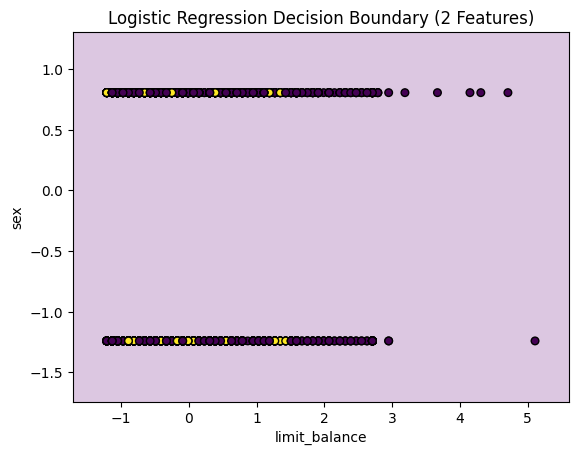

In [78]:
# mengambil dua fitur pertama
X_train_2d = X_train_scal[:, :2]

# Fit model regresi logistik pada dua fitur pertama
model_logreg.fit(X_train_2d, y_train)

# Mendapatkan nilai minimum dan maksimum dari kedua fitur untuk membuat plot
x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5

# Membuat grid untuk plot decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Memprediksi kelas untuk setiap titik pada grid
Z = model_logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap='PuRd', alpha=0.8)

# Plot data pelatihan
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=30, edgecolor='k')

plt.xlabel('limit_balance')
plt.ylabel('sex')
plt.title('Logistic Regression Decision Boundary (2 Features)')
plt.show()

Insight: Tidak didapatkan decission boundary dari feture 'sex' dan 'limit_balance'

Model Evaluation menggunakan KNN

In [79]:
# Model Evaluation dengan KNN - Train Set & Test Set

print(classification_report(y_train, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1753
           1       0.76      0.45      0.57       470

    accuracy                           0.85      2223
   macro avg       0.81      0.71      0.74      2223
weighted avg       0.84      0.85      0.84      2223

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       577
           1       0.51      0.30      0.38       165

    accuracy                           0.78       742
   macro avg       0.67      0.61      0.62       742
weighted avg       0.75      0.78      0.76       742



Insight: Dari model evaluasi KNN yang dilakukan dapat dikatakan bahwa dengan 'recall' dari semua data '0' yang dianggap recall ada 96%. Nilai ini paling besar dibandingkan dengan menggunakan precision dan f1-score.

Model Evaluation menggunakan SVM

In [80]:
# Model Evaluation menggunakan SVM
#Dengan f1 score

def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  return f1_score(y, y_pred)

print('Non Scaled SVM')
print('Train : ', performance_check(svm_non_scaled, X_train, y_train))
print('Test  : ', performance_check(svm_non_scaled, X_test, y_test))
print('')

print('Scaled SVM')
print('Train : ', performance_check(svm_scaled, X_train_scal, y_train))
print('Test  : ', performance_check(svm_scaled, X_test_scal, y_test))


Non Scaled SVM
Train :  0.004246284501061571
Test  :  0.0

Scaled SVM
Train :  0.5269121813031161
Test  :  0.44642857142857145


Insight: Hasil dari Evaluasi dengan model SVM dengan kernel RBF , Untuk data yang tidak di scaling  data Train sebesar 0.004 dan data Test sebesar 0.0 .Sedangkan untuk data yang telah di scaling data Train sebesar 0.527 dan data Test sebesar 0.446 

#### Model Evaluasi hasil  Baseline 

##### Hasil Baseline Logistic Regression

F1 Score - Test Set   :  0.3696682464454976 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       577
           1       0.85      0.24      0.37       165

    accuracy                           0.82       742
   macro avg       0.83      0.61      0.63       742
weighted avg       0.83      0.82      0.78       742
 

Confusion Matrix      : 


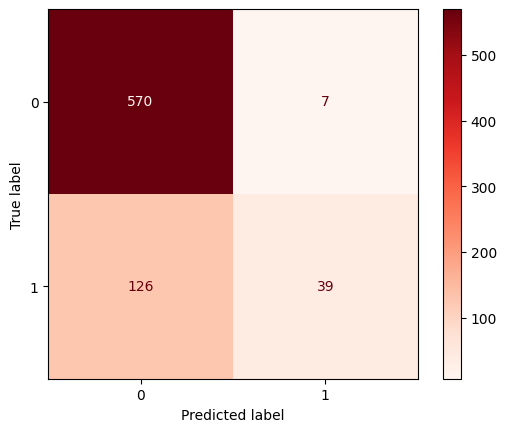

In [81]:
# Check Performance Model Logreg against Test-Set

y_pred_test_lr = lr_h.predict(X_test_scal)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_lr), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_lr), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr_h, X_test_scal, y_test, cmap='Reds'))



Insight: Dari data test
* Data True positive(yang membayar bulan depan) sebanyak 570

In [82]:
# Save Classification Report ke dalam Dictionary

reports_all_lr = {}
def performance_report(reports_all, y_train, y_pred_train_lr, y_test, y_pred_test_lr, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train_lr),
      'train - recall' : recall_score(y_train, y_pred_train_lr),
      'train - accuracy' : accuracy_score(y_train, y_pred_train_lr),
      'train - f1_score' : f1_score(y_train, y_pred_train_lr),
      'test - precision' : precision_score(y_test, y_pred_test_lr),
      'test - recall' : recall_score(y_test, y_pred_test_lr),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test_lr),
      'test - f1_score' : f1_score(y_test, y_pred_test_lr),
  }
  reports_all_lr[name] = score_reports
  return reports_all_lr

reports_all_lr= performance_report(reports_all_lr, y_train, y_pred_train_lr, y_test, y_pred_test_lr, 'Baseline Model LogReg(Default Hyperparameter)')
pd.DataFrame(reports_all_lr)

,Baseline Model LogReg(Default Hyperparameter)
train - precision,0.742857
train - recall,0.276596
train - accuracy,0.826811
train - f1_score,0.403101
test - precision,0.847826
test - recall,0.236364
test - accuracy_score,0.820755
test - f1_score,0.369668


##### Hasil Baseline Model SVM

F1 Score - Test Set   :  0.44642857142857145 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       577
           1       0.85      0.30      0.45       165

    accuracy                           0.83       742
   macro avg       0.84      0.64      0.67       742
weighted avg       0.84      0.83      0.80       742
 

Confusion Matrix      : 


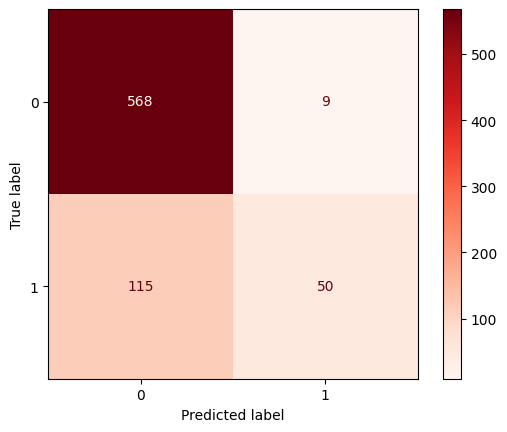

In [83]:
# Check Performance Model Logreg against Test-Set

y_pred_test_svm = svm_h.predict(X_test_scal)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svm), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svm), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_h, X_test_scal, y_test, cmap='Reds'))


Insight: 
* Dari data test precission data yang dianggap benar-benar data '0' di dapat 83% dan data '1' sebesar 85% data yang benar. Dengan recall data yang dianggap benar-benar data '0' di dapat 98% dan data '1' sebesar 30% data yang benar. Dengan f1-score 
data yang dianggap benar-benar data '0' di dapat 90% dan data '1' sebesar 45% data yang benar.
* Data True positive(yang membayar bulan depan) sebanyak 568


In [84]:
# Save Classification Report ke dalam Dictionary

reports_all_svm = {}
def performance_report(reports_all_svm, y_train, y_pred_train_svm, y_test, y_pred_test_svm, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train_svm),
      'train - recall' : recall_score(y_train, y_pred_train_svm),
      'train - accuracy' : accuracy_score(y_train, y_pred_train_svm),
      'train - f1_score' : f1_score(y_train, y_pred_train_svm),
      'test - precision' : precision_score(y_test, y_pred_test_svm),
      'test - recall' : recall_score(y_test, y_pred_test_svm),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test_svm),
      'test - f1_score' : f1_score(y_test, y_pred_test_svm),
  }
  reports_all_svm[name] = score_reports
  return reports_all_svm

reports_all_lr= performance_report(reports_all_svm, y_train, y_pred_train_svm, y_test, y_pred_test_svm, 'Baseline Model svm(Default Hyperparameter)')
pd.DataFrame(reports_all_svm)

,Baseline Model svm(Default Hyperparameter)
train - precision,0.788136
train - recall,0.395745
train - accuracy,0.849753
train - f1_score,0.526912
test - precision,0.847458
test - recall,0.303030
test - accuracy_score,0.832884
test - f1_score,0.446429


##### Hasil Baseline Model KNN

F1 Score - Test Set   :  0.37344398340248963 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       577
           1       0.59      0.27      0.37       165

    accuracy                           0.80       742
   macro avg       0.71      0.61      0.63       742
weighted avg       0.77      0.80      0.77       742
 

Confusion Matrix      : 


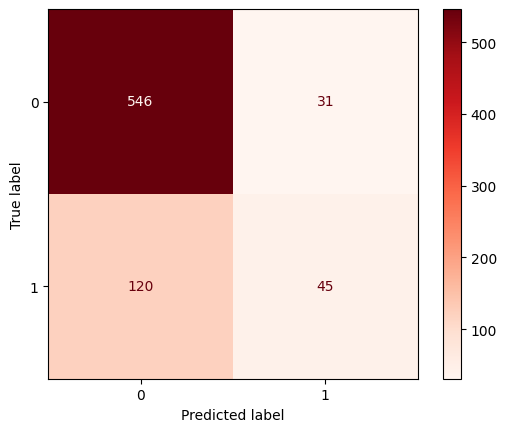

In [85]:
# Check Performance Model KNN against Test-Set

y_pred_test_knn = knn_h.predict(X_test_scal)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_knn), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_h, X_test_scal, y_test, cmap='Reds'))

Insight: Dari data test
* Data True positive(yang membayar bulan depan) sebanyak 546

In [86]:
# Save Classification Report ke dalam Dictionary

reports_all_knn = {}
def performance_report(reports_all_knn, y_train, y_pred_train_knn, y_test, y_pred_test_knn, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train_knn),
      'train - recall' : recall_score(y_train, y_pred_train_knn),
      'train - accuracy' : accuracy_score(y_train, y_pred_train_knn),
      'train - f1_score' : f1_score(y_train, y_pred_train_knn),
      'test - precision' : precision_score(y_test, y_pred_test_knn),
      'test - recall' : recall_score(y_test, y_pred_test_knn),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn),
      'test - f1_score' : f1_score(y_test, y_pred_test_knn),
  }
  reports_all_knn[name] = score_reports
  return reports_all_knn

reports_all_knn= performance_report(reports_all_knn, y_train, y_pred_train_knn, y_test, y_pred_test_knn, 'Baseline Model KNN(Default Hyperparameter)')
pd.DataFrame(reports_all_knn)

,Baseline Model KNN(Default Hyperparameter)
train - precision,0.757143
train - recall,0.451064
train - accuracy,0.853351
train - f1_score,0.565333
test - precision,0.592105
test - recall,0.272727
test - accuracy_score,0.796496
test - f1_score,0.373444


#### Model Evaluasi hasil Hyperparameter Tuning 

* Evaluasi Hyperparameter Tuning Logistic Regressor

F1 Score - Test Set   :  0.3137254901960784 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       577
           1       0.82      0.19      0.31       165

    accuracy                           0.81       742
   macro avg       0.82      0.59      0.60       742
weighted avg       0.81      0.81      0.76       742
 

Confusion Matrix      : 


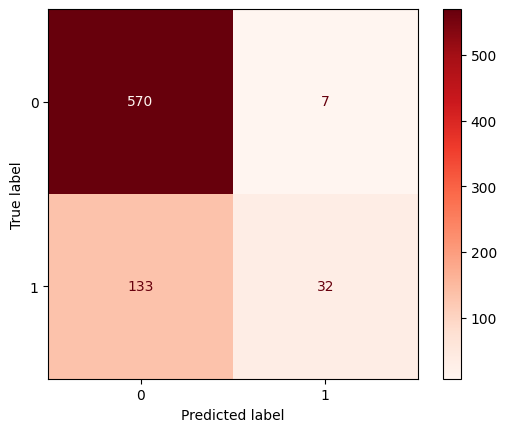

In [87]:
# Check Performance Model Logistic Regressor against Test-Set

y_pred_test_lrh = logistic_grid_search.predict(X_test_scal)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_lrh), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_lrh), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logistic_grid_search, X_test_scal, y_test, cmap='Reds'))

Insight: 
* Dari data test precission data yang dianggap benar-benar data '0' di dapat 81% dan data '1' sebesar 82% data yang benar. Dengan recall data yang dianggap benar-benar data '0' di dapat 99% dan data '1' sebesar 19% data yang benar. Dengan f1-score 
data yang dianggap benar-benar data '0' di dapat 89% dan data '1' sebesar 31% data yang benar.
* Data True positive(yang membayar bulan depan) sebanyak 570

* Evaluasi Hyperparameter Tuning SVM

F1 Score - Test Set   :  0.44642857142857145 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       577
           1       0.85      0.30      0.45       165

    accuracy                           0.83       742
   macro avg       0.84      0.64      0.67       742
weighted avg       0.84      0.83      0.80       742
 

Confusion Matrix      : 


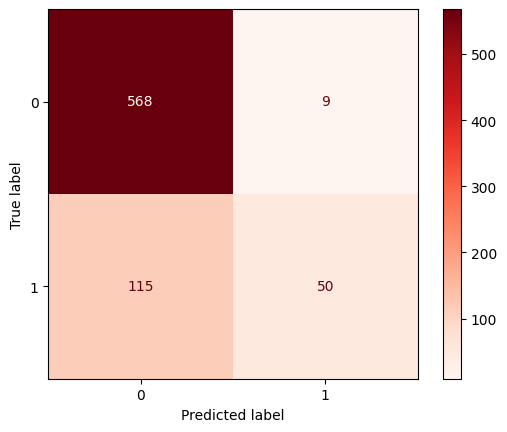

In [88]:
# Check Performance Model SVM against Test-Set

y_pred_test_svmh = svm_grid_search.predict(X_test_scal)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svmh), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svmh), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_grid_search, X_test_scal, y_test, cmap='Reds'))

Insight: 
* Dari data test precission data yang dianggap benar-benar data '0' di dapat 83% dan data '1' sebesar 85% data yang benar. Dengan recall data yang dianggap benar-benar data '0' di dapat 98% dan data '1' sebesar 30% data yang benar. Dengan f1-score 
data yang dianggap benar-benar data '0' di dapat 90% dan data '1' sebesar 45% data yang benar.
* Data True positive(yang membayar bulan depan) sebanyak 568

* Evaluasi Hyperparameter Tuning KNN

F1 Score - Test Set   :  0.40358744394618834 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       577
           1       0.78      0.27      0.40       165

    accuracy                           0.82       742
   macro avg       0.80      0.63      0.65       742
weighted avg       0.81      0.82      0.79       742
 

Confusion Matrix      : 


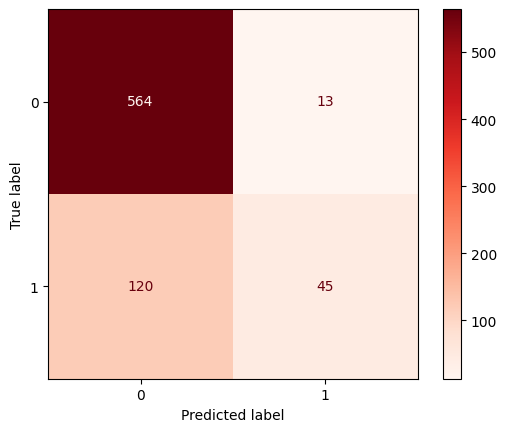

In [89]:
# Check Performance Model KNN against Test-Set

y_pred_test_knnh = knn_grid_search.predict(X_test_scal)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_knnh), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knnh), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_grid_search, X_test_scal, y_test, cmap='Reds'))

Insight: 
* Dari data test precission data yang dianggap benar-benar data '0' di dapat 82% dan data '1' sebesar 78% data yang benar. Dengan recall data yang dianggap benar-benar data '0' di dapat 98% dan data '1' sebesar 27% data yang benar. Dengan f1-score 
data yang dianggap benar-benar data '0' di dapat 89% dan data '1' sebesar 40% data yang benar.
* Data True positive(yang membayar bulan depan) sebanyak 564

# Model Saving

In [90]:
# Save model yang digunakan to a file
with open('model.pkl', 'wb') as file1:
    pkl.dump(svm_grid_search, file1)

with open('scaling.pkl','wb') as file2:
    pkl.dump(scaler, file2)

Insight: Save model Hyperparameter Tuning SVM sebagai model yang digunakan karena memiliki F1 Score - Test Set 0.44

# Model Inference

In [91]:
# Load Model
with open('model.pkl', 'rb') as file_1:
  model_Hypertuning_svm=pkl.load(file_1)

with open('scaling.pkl', 'rb') as file_2:
  scalingku=pkl.load(file_2)

In [92]:
num_features = 23
new_data= np.random.rand(5000, 23)
new_data


data_numerik=df.select_dtypes(exclude=['object'])
data_kategorik=df.select_dtypes(include=['object'])

In [93]:
#Scaling data baru dengan metode scaling yang sama dengan yang digunakan Model yang disimpan
scaled_new_data = scalingku.transform(new_data)

d:\ProgramData\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [94]:
new_data.shape

(5000, 23)

In [95]:
#Membuat prediksi dari data yang baru dibuat
predictions = model_Hypertuning_svm.predict(scaled_new_data)
print("Prediksi untuk data baru:", predictions)

Prediksi untuk data baru: [0 0 0 ... 0 0 0]


# Kesimpulan

Dari beberapa Algorithma yang digunakan(Logistic Regression, SVM, KNN beserta melakukan Hypertuning dengan menggunakan cross validation) untuk menganalisa Efek dari Feature-feature yang ada dari data df terhadap feature 'default_payment_next_month' dapat disimpulkan bahwa dengan menggunakan Hyperparameter Tuning SVM merupakan cara yang paling baik untuk mengetahui hubungan dari feature-feature tersebut dengan feature 'Hyperparameter Tuning SVM' dilihat dari nilai f1-score saat data test sebesar 0.44 dibandingkan dengan yang lainnya.


### Conceptual Problem:
1. Apakah yang dimaksud dengan coeficient pada logistic regression?

2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

3. Bagaimana cara memilih K yang optimal pada KNN ?

4. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

##### Jawaban Conceptual Problem No1:
* Coeficient pada Logistic Regression adalah bobot yang diberikan pada setiap feature (Variabel Independen) dalam model.Setiap Feature memiliki coeficient yang sesuai yang menunjukkan seberapa besar pengaruh feature terhadap hasil prediksi. 
* Dari hasil Algorithma Logistic Regression yang telah dilakukan, coeficient yang didapat pada beberapa feature dalam data X adalah:

 Coefficient :  [[-0.18995854  0.03184128 -0.05932614 -0.09891318  0.08410958  0.75191318
  -0.07144142  0.09130431  0.02676682  0.20012123  0.08013411 -0.28353447
  -0.06934172  0.60984366 -0.29629669  0.02181148  0.02762384 -0.12408393
  -0.51593672 -0.33069773 -0.0131476  -0.09044285 -0.05137364]]
* Didapatkan dari coeficient tersebut bahwa coeficient yang paling baik adalah yang paling mendekati '1' yaitu di coeficient 0.751 .Artinya Feature tersebut memiliki relasi yang dekat dengan feature default_payment_next_month.

##### Jawaban Conceptual Problem No2:
* Fungsi Parameter Kernel pada SVM adalah untuk menentukan jenis kernel yang akan digunakan oleh model. Kernel adalah fungsi matematika yang digunakan untuk menghitung jarak atau kesamaan antara pasangan data dalam ruang fitur yang mungkin memiliki dimensi tinggi atau tidak. Terkait dengan kernel yang saya gunakan dalam algorithma model SVM adalah kernel RBF karena dibandingkan yang lain lebih mudah digunakan dan tidak memakan waktu lama.

* RBF Kernel adalah kernel yang paling umum digunakan untuk mengukur kesamaan antara dua sampel berdasarkan jarak radial mereka dalam ruang fitur. Kernel RBF memperkenalkan dimensi tak terbatas ke dalam ruang fitur, yang memungkinkan SVM untuk menangani pemisahan yang tidak linier dengan baik.

##### Jawaban Conceptual Problem No3:
Pemilihan Parameter K dalam KNN yang tepat dapat mempengaruhi kinerja dan keakuratan model. Beberapa metode umum yang digunakan untuk memilih parameter K adalah Cross-Validation, Repeated Cross-Validation, Repeated K-Fold Cross-Validation, dsb. 

Dalam algorithm yang saya gunakan , saya menemukan bahwa penggunaan Cross Validation model SVM dengan 'cross_val_score' dapat menghasilkan rata-rata F1- Score yang lebih tinggi sebesar 0.45 dibandingkan dengan model Logistic Regression dan KNN.

##### Jawaban Conceptual Problem No4:
* Accuracy: Accuracy mengukur seberapa sering model melakukan prediksi yang benar.Dalam hal ini yaitu rasio prediksi yang benar (Positif dan Negatif) dengan jumlah total prediksi. Cocok digunakan ketika kelas target dalam dataset seimbang.

* Precission: Precission mengukur seberapa banyak prediksi positif yang benar. Dalam hal ini, adalah rasio prediksi positif yang benar (true positive) dengan total prediksi positif (true positive + false positive). Precision berguna ketika penting untuk meminimalkan false positive.

* Recall: Recall mengukur seberapa banyak kelas positif yang berhasil diprediksi oleh model. Dalam hal ini, adalah rasio prediksi positif yang benar (true positive) dengan jumlah sebenarnya dari kelas positif (true positive + false negative). Recall cocok saat ketika penting meminimalisir false negatif.

* f1 score: f1 score adalah ukuran gabungan dari precission dan recall yang memberikan keseimbangan antar keduanya. Ini adalah rata-rata harmonis dari precision dan recall, diberikan oleh rumus: F1 = 2 * (precision * recall) / (precision + recall). Cocok digunakan saat kelas target tidak seimbang. 

Dalam algorithm yang saya gunakan, saya melihat dari sisi F1- score karena berkaitan dengan penjabaran diatas adalah rata-rata yang harmonis antara precission dan recall.
